In [3]:
import glob
import numpy
import sklearn as sklearn
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [4]:
with open('timeseries_data/dataset.csv', 'r') as f:
    df = pandas.read_csv(f, index_col=0)

In [5]:
train_set = df.iloc[:150]
val_set = df.iloc[150:]

In [6]:
train_set

,ratio_norm,speaker_count_norm,sentence_count_norm,positive_norm,negative_norm,log_returns_-10,log_returns_-9,log_returns_-8,log_returns_-7,log_returns_-6,...,log_returns_0,log_returns_1,log_returns_2,log_returns_3,log_returns_4,log_returns_5,log_returns_6,log_returns_7,log_returns_8,log_returns_9
ticker,,,,,,,,,,,,,,,,,,,,,
AAON,-0.213142,0.36,0.444142,0.797589,0.429931,-0.008481,-0.010089,-0.038741,0.054896,-0.012372,...,-0.013104,0.069989,NaN,NaN,-0.063055,-0.002789,0.004747,-0.013995,-0.011550,NaN
ACT,0.402443,0.44,0.470481,0.810261,1.501516,-0.009510,-0.004581,-0.014292,0.011785,0.009992,...,-0.063721,0.067941,NaN,NaN,0.004202,0.022799,-0.019868,-0.008396,0.003367,NaN
ADNT,0.410808,0.40,0.534060,0.582169,1.294112,NaN,0.002589,-0.049553,0.000815,-0.009546,...,-0.079505,-0.014972,0.027711,NaN,NaN,0.031155,-0.014041,0.005078,0.003371,-0.016113
AEHL,-0.709592,0.28,0.190736,-1.711417,-1.402135,NaN,NaN,-0.018869,0.009479,0.009390,...,0.035718,-0.008811,0.000000,0.000000,NaN,NaN,0.008811,-0.017700,-0.027151,0.018182
AES,-0.193963,0.04,0.516803,0.011941,-0.054011,-0.012076,-0.034523,0.021875,0.003811,NaN,...,0.008416,NaN,NaN,-0.043270,0.025468,0.016478,-0.027313,0.003625,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KMMPF,-0.483769,0.60,0.476839,0.011941,-0.434251,0.000000,0.000000,0.000000,0.004723,0.000000,...,0.000000,0.055766,NaN,NaN,0.014855,0.000000,0.000000,0.000000,0.000000,NaN
KNSA,-0.546770,0.32,0.190736,-1.052486,-1.021895,NaN,NaN,-0.010345,-0.041581,0.007201,...,0.136827,0.080104,-0.005882,0.009541,NaN,NaN,-0.041005,0.046105,0.029361,-0.018519
KNTK,-0.129396,0.36,0.352407,-0.710349,-0.468819,-0.001289,-0.029120,-0.014379,0.012052,0.024652,...,-0.035079,0.067608,NaN,NaN,0.013527,0.009361,-0.007013,-0.020312,0.014262,NaN


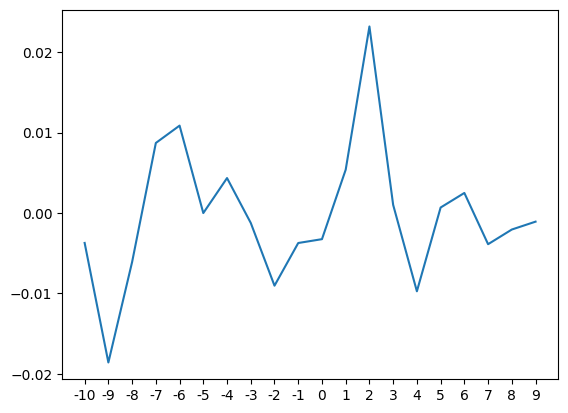

In [7]:

plt.plot([x.split("_")[-1] for x in train_set.columns[5:]],train_set.mean(axis=0).iloc[5:])

In [8]:
# Fits a time series model to the data
# Returns the model
def fit_model(data):
    model = sm.tsa.SARIMAX(data, order=(1, 1, 1))
    model_fit = model.fit(d)
    return model_fit

In [9]:
train_set

,ratio_norm,speaker_count_norm,sentence_count_norm,positive_norm,negative_norm,log_returns_-10,log_returns_-9,log_returns_-8,log_returns_-7,log_returns_-6,...,log_returns_0,log_returns_1,log_returns_2,log_returns_3,log_returns_4,log_returns_5,log_returns_6,log_returns_7,log_returns_8,log_returns_9
ticker,,,,,,,,,,,,,,,,,,,,,
AAON,-0.213142,0.36,0.444142,0.797589,0.429931,-0.008481,-0.010089,-0.038741,0.054896,-0.012372,...,-0.013104,0.069989,NaN,NaN,-0.063055,-0.002789,0.004747,-0.013995,-0.011550,NaN
ACT,0.402443,0.44,0.470481,0.810261,1.501516,-0.009510,-0.004581,-0.014292,0.011785,0.009992,...,-0.063721,0.067941,NaN,NaN,0.004202,0.022799,-0.019868,-0.008396,0.003367,NaN
ADNT,0.410808,0.40,0.534060,0.582169,1.294112,NaN,0.002589,-0.049553,0.000815,-0.009546,...,-0.079505,-0.014972,0.027711,NaN,NaN,0.031155,-0.014041,0.005078,0.003371,-0.016113
AEHL,-0.709592,0.28,0.190736,-1.711417,-1.402135,NaN,NaN,-0.018869,0.009479,0.009390,...,0.035718,-0.008811,0.000000,0.000000,NaN,NaN,0.008811,-0.017700,-0.027151,0.018182
AES,-0.193963,0.04,0.516803,0.011941,-0.054011,-0.012076,-0.034523,0.021875,0.003811,NaN,...,0.008416,NaN,NaN,-0.043270,0.025468,0.016478,-0.027313,0.003625,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KMMPF,-0.483769,0.60,0.476839,0.011941,-0.434251,0.000000,0.000000,0.000000,0.004723,0.000000,...,0.000000,0.055766,NaN,NaN,0.014855,0.000000,0.000000,0.000000,0.000000,NaN
KNSA,-0.546770,0.32,0.190736,-1.052486,-1.021895,NaN,NaN,-0.010345,-0.041581,0.007201,...,0.136827,0.080104,-0.005882,0.009541,NaN,NaN,-0.041005,0.046105,0.029361,-0.018519
KNTK,-0.129396,0.36,0.352407,-0.710349,-0.468819,-0.001289,-0.029120,-0.014379,0.012052,0.024652,...,-0.035079,0.067608,NaN,NaN,0.013527,0.009361,-0.007013,-0.020312,0.014262,NaN


In [10]:
# trains an OLS model on the data
# Returns the model
def fit_ols(X,Y):
    model = sm.OLS(Y,X)
    model_fit = model.fit()
    return model_fit




In [11]:
train_set.replace(numpy.nan, 0).iloc[:,5:].values.mean()

-0.0013296138613821467

In [12]:
train_set.replace(numpy.nan, 0).iloc[:,:15]

,ratio_norm,speaker_count_norm,sentence_count_norm,positive_norm,negative_norm,log_returns_-10,log_returns_-9,log_returns_-8,log_returns_-7,log_returns_-6,log_returns_-5,log_returns_-4,log_returns_-3,log_returns_-2,log_returns_-1
ticker,,,,,,,,,,,,,,,
AAON,-0.213142,0.36,0.444142,0.797589,0.429931,-0.008481,-0.010089,-0.038741,0.054896,-0.012372,0.000000,0.000000,-0.001123,0.002551,-0.006030
ACT,0.402443,0.44,0.470481,0.810261,1.501516,-0.009510,-0.004581,-0.014292,0.011785,0.009992,0.000000,0.000000,0.008251,-0.012402,-0.016356
ADNT,0.410808,0.40,0.534060,0.582169,1.294112,0.000000,0.002589,-0.049553,0.000815,-0.009546,0.012257,0.000000,0.000000,-0.003525,0.009463
AEHL,-0.709592,0.28,0.190736,-1.711417,-1.402135,0.000000,0.000000,-0.018869,0.009479,0.009390,-0.018869,0.037388,0.000000,0.000000,0.009132
AES,-0.193963,0.04,0.516803,0.011941,-0.054011,-0.012076,-0.034523,0.021875,0.003811,0.000000,0.000000,-0.021359,-0.024477,-0.006659,0.001335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KMMPF,-0.483769,0.60,0.476839,0.011941,-0.434251,0.000000,0.000000,0.000000,0.004723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
KNSA,-0.546770,0.32,0.190736,-1.052486,-1.021895,0.000000,0.000000,-0.010345,-0.041581,0.007201,-0.035604,-0.000930,0.000000,0.000000,0.021170
KNTK,-0.129396,0.36,0.352407,-0.710349,-0.468819,-0.001289,-0.029120,-0.014379,0.012052,0.024652,0.000000,0.000000,-0.005535,-0.036573,-0.011923


In [13]:
predictions = []
models=[]
adj_r_squared = []
for i in range(10):
    model = fit_ols(train_set.replace(numpy.nan, 0).iloc[:,:15+i],train_set.replace(numpy.nan, 0).iloc[:,15+i])
    models.append(model)
    adj_r_squared.append(model.summary().tables[0][1][3].data)
    predictions.append(model.predict(train_set.replace(numpy.nan, 0).iloc[:,:15+i]))


In [14]:
import pandas as pd

In [15]:
predictions= pd.DataFrame(predictions)
predictions

ticker,AAON,ACT,ADNT,AEHL,AES,AFRAF,AHEXF,AINC,AKR,AKRTF,...,JOUT,KAI,KE,KHOTF,KLBAY,KMMPF,KNSA,KNTK,KOP,KPTI
0,0.000111,-0.019868,0.001852,0.019249,0.003467,-0.027200,-0.009644,0.021665,-0.016577,0.014258,...,0.017472,-0.003569,-0.003296,-0.038503,-0.122703,0.016807,0.042985,-0.004544,0.014578,-0.080251
1,0.003246,-0.001781,-0.006898,-0.000856,-0.017648,-0.036110,-0.018195,0.003171,0.014021,0.006085,...,0.024498,-0.030182,0.005257,0.031738,-0.040924,0.022409,-0.015619,0.018241,0.004117,-0.005509
2,-0.004859,0.003906,0.010015,0.000579,-0.001777,0.008992,0.001593,0.008059,0.025118,0.005029,...,0.007292,0.013763,0.003406,-0.022809,0.002463,0.005470,0.000738,0.007125,-0.000970,-0.003868
3,-0.001116,0.002719,0.004589,0.013147,-0.011740,0.005909,0.003834,-0.002223,-0.001204,-0.002066,...,-0.008354,0.003981,0.000832,-0.000044,-0.004395,0.002050,0.001114,-0.000752,0.002566,0.000458
4,-0.008047,-0.012759,0.001661,0.002382,-0.002514,-0.043527,-0.007686,0.007431,-0.010688,0.000466,...,-0.017700,-0.000307,-0.009794,-0.022651,-0.024846,-0.013254,-0.004323,-0.003391,-0.004623,-0.027156
5,-0.001650,0.000073,-0.002047,-0.000553,0.010845,0.015109,0.000127,0.004881,0.006496,0.001100,...,0.009575,0.007026,-0.003812,0.006242,0.045562,0.000080,0.006363,0.000384,-0.004127,0.005553
6,-0.006534,0.000296,0.009766,0.040664,-0.026316,0.001740,-0.001602,0.017146,0.008154,0.003027,...,-0.002121,-0.001480,0.008196,0.021565,0.005781,0.004510,-0.018491,0.001753,0.009706,0.020103
7,-0.013921,-0.004313,-0.016630,0.001183,-0.013824,-0.006103,0.001425,-0.013413,-0.001724,-0.006792,...,-0.011814,0.008544,-0.003137,-0.011863,-0.020330,-0.006038,0.007174,-0.005192,-0.000749,-0.003381
8,-0.004904,-0.001435,0.002345,-0.005244,0.010903,-0.002242,0.001405,-0.008228,0.001415,0.002473,...,0.005153,-0.000780,0.003158,-0.023268,-0.005988,0.000851,0.011210,-0.003989,-0.003329,-0.019343
9,-0.000179,-0.004264,-0.004069,0.004026,-0.002308,0.002446,-0.001662,0.001350,-0.004851,0.000943,...,0.001103,-0.001296,0.003249,0.002952,0.000407,-0.001082,-0.003244,-0.002283,0.000555,0.000899


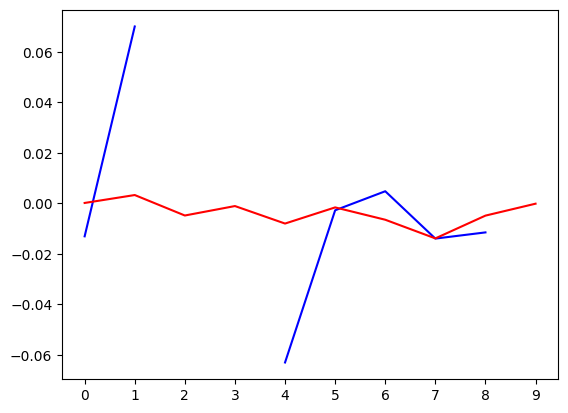

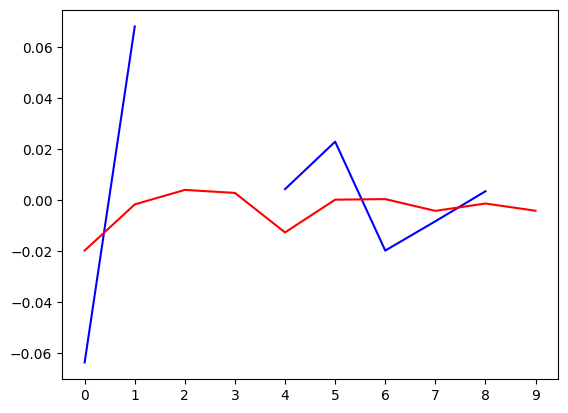

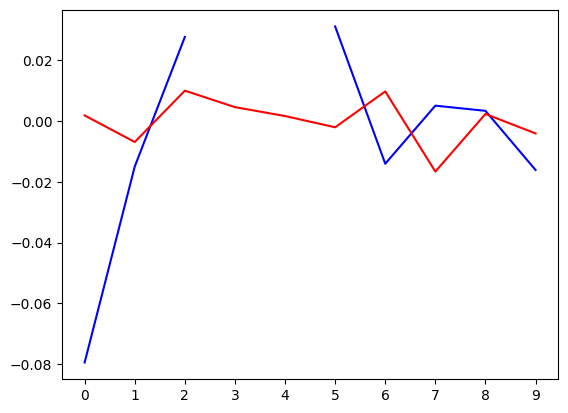

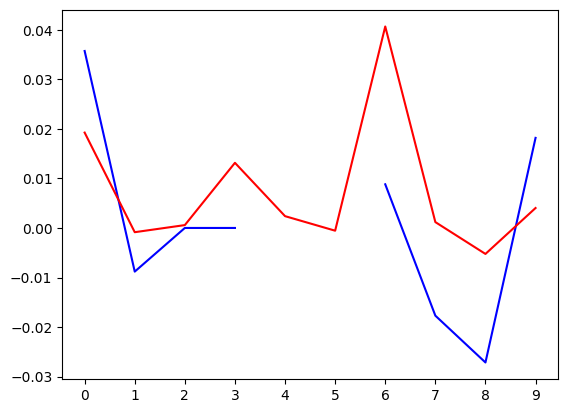

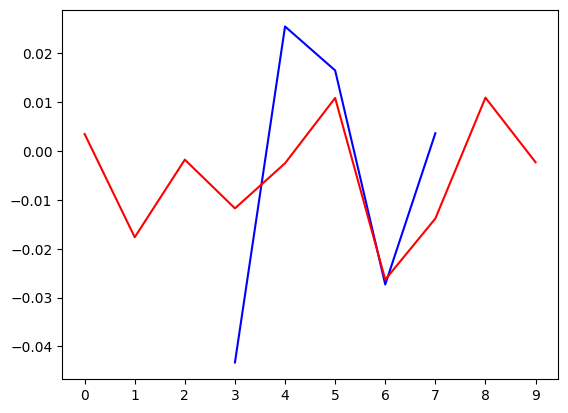

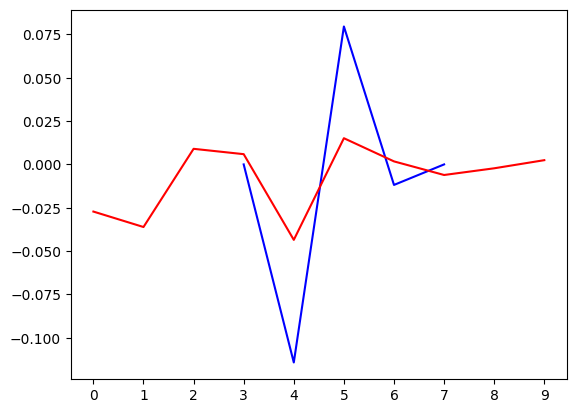

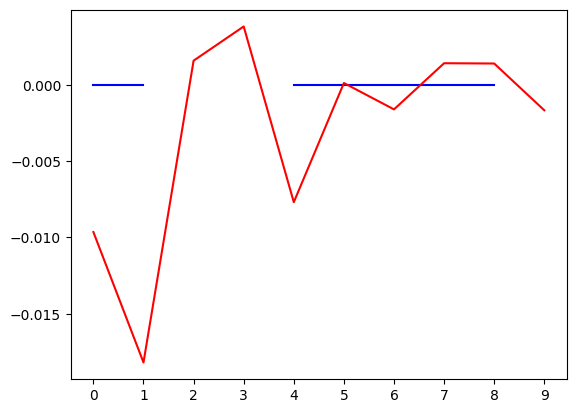

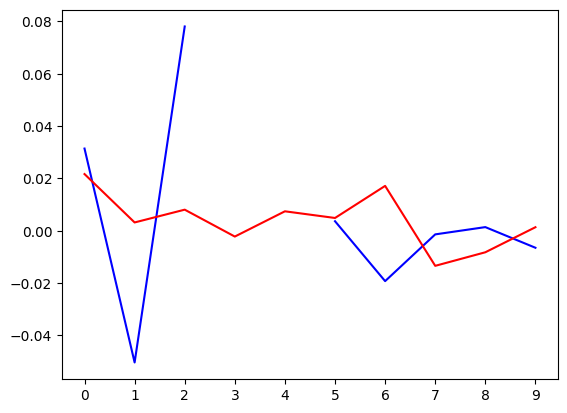

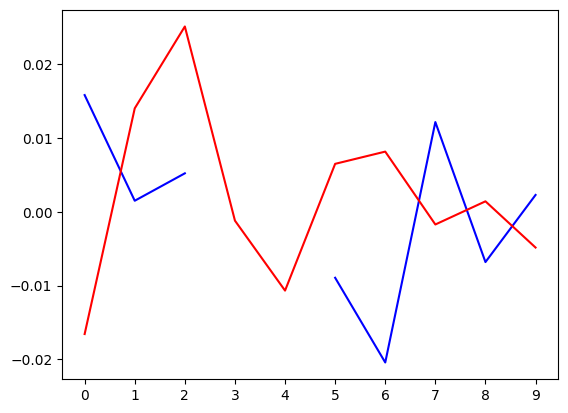

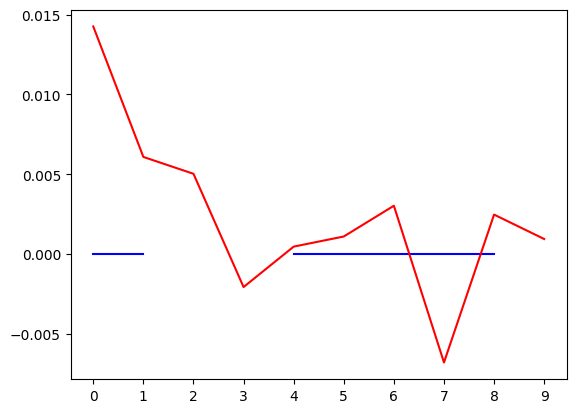

In [16]:
for i in range(10):
    plt.plot([x.split("_")[-1] for x in train_set.columns[15:]],train_set.iloc[i,15:], c="blue")
    plt.plot([x.split("_")[-1] for x in train_set.columns[15:]],predictions.iloc[:,i], c="red")
    plt.show()